# 交叉点平均

In [1]:
import pyproj
from  pyproj  import  CRS
import h5py
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm, colors
import glob
from mpl_toolkits.basemap import Basemap

In [13]:
"读取单个h5文件并可视化,最后图像为一条轨道上的数据"

dir_path = '.\H2B_nc_data\ICESAT2_ATL12_20200711'
ncfiles = glob.glob(dir_path + '\*.h5')
lon_array = np.array([])
lat_array = np.array([])
swh_array = np.array([])
for ncfile in ncfiles:
    with h5py.File(ncfile, 'r') as f:
        lats = f['gt2l']['ssh_segments']['latitude'][:]
        lons = f['gt2l']['ssh_segments']['longitude'][:]
        swh = f['gt2l']['ssh_segments']['heights']['swh'][:]
    lon_array = np.append(lon_array, lons)
    lat_array = np.append(lat_array, lats)
    swh_array = np.append(swh_array, swh)


In [20]:
# 设置空间分辨率
resolution = 5000
nlat, nlon =(projlats.max()-projlats.min())/resolution, (projlons.max() - projlons.min())/resolution
nlat = np.int(nlat)
nlon = np.int(nlon)
swh_grid = np.full(shape=(nlon,nlat), fill_value=np.nan)

swh_grid_num = np.zeros((nlon,nlat))

In [16]:
# 将WGS 84坐标（4326）转化为等距圆柱投影（4088）
crs = CRS.from_epsg(4326)
crs = CRS.from_string("epsg:4326")
crs = CRS.from_proj4("+proj=latlon")
crs = CRS.from_user_input(4326)
crs2 = CRS.from_epsg(4088)
crs2 = CRS.from_string("epsg:4088")
crs2 = CRS.from_proj4("+proj=latlon")
crs2 = CRS.from_user_input(4088)

transformer = pyproj.Transformer.from_crs(crs,crs2)
transformer_back = pyproj.Transformer.from_crs(crs2,crs)
projlats,projlons = transformer.transform(lat_array,lon_array)

In [18]:
# 填充每个点的数值，将有重复数据的点标记到swh_grid_num中,最后求平均
for i in range(len(swh_array)):
    x = int(projlons[i]/resulotion)
    y = int(projlats[i]/resulotion)
    
    if swh_grid_num[x][y] == 0:
        swh_grid[x][y] = swh_array[i]
        swh_grid_num[x][y] += 1
    else:
        swh_grid[x][y] += swh_array[i]
        swh_grid_num[x][y] += 1
swh_grid = swh_grid / swh_grid_num

In [19]:
swh_grid_num.max()

18.0

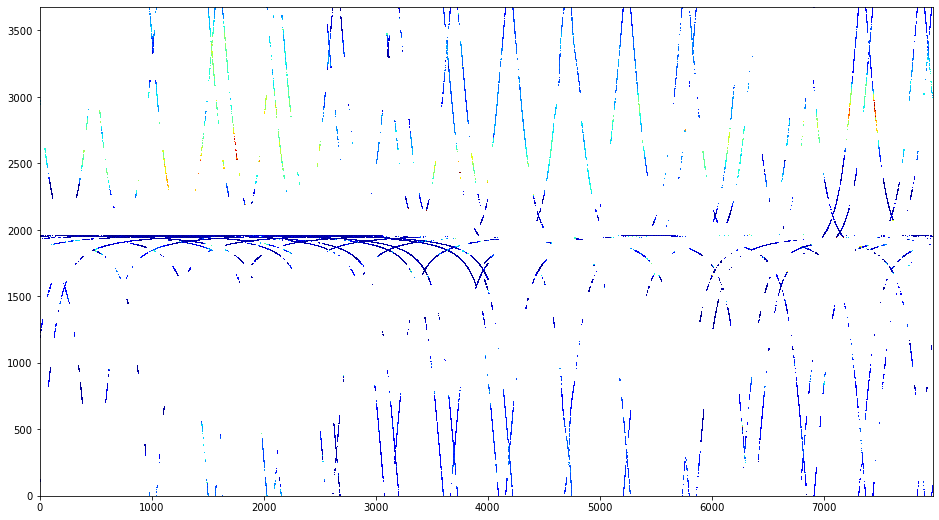

In [65]:
plt.figure(figsize=(16,9))
plt.pcolor(swh_grid, cmap=plt.cm.jet,vmin=0, vmax=10)
plt.show()
plt.close()

In [50]:
print(swh_grid.shape)

(3680, 7972)


In [56]:
print(nlat, nlon)
y, x = np.arange(int(nlon)),np.arange(int(nlat))
print(x.shape, y.shape)

xx , yy = np.meshgrid(x * resolution, y * resolution)
print(xx.shape, yy.shape, swh_grid.shape)


7972 3680
(7972,) (3680,)
(3680, 7972) (3680, 7972) (3680, 7972)


In [53]:
print(xx[2])
transformer = pyproj.Transformer.from_crs(crs2,crs)
xx , yy = transformer.transform(xx , yy)

[      0    1000    2000 ... 7969000 7970000 7971000]


In [55]:
print(yy[1])

[0.00000000e+00 8.99320618e-03 1.79864124e-02 ... 7.16668600e+01
 7.16758532e+01 7.16848464e+01]


<ipython-input-59-55c19e039257>:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  h = m.pcolor(xi , yi, data=swh_grid)


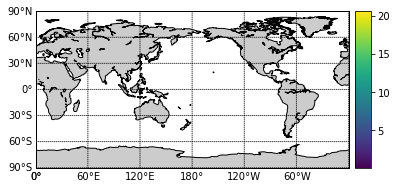

In [59]:
m = Basemap(projection='cyl', llcrnrlat=-90, urcrnrlat=90, llcrnrlon=0, urcrnrlon=360, resolution='c')
# m = Basemap(projection='npaeqd', boundinglat=60, lon_0=180, resolution='c')
xi, yi = m(xx , yy)
# Draw the scatterplot
h = m.pcolor(xi , yi, data=swh_grid)
m.colorbar(location='right')
# plt.cm.ScalarMappable.set_clim(h, vmin=0, vmax=10)

m.drawcoastlines()
m.fillcontinents()
m.drawmapboundary()
m.drawparallels(np.arange(-90., 120., 30.), labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180., 180., 60.), labels=[0, 0, 0, 1])

plt.show()